In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [2]:
# Load the dataset
dataset = 'Data/diamonds.csv'
diamonds = pd.read_csv(dataset)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


## Menangani Missing Value dan Outliers

### Menangani Missing Value

Pada kolom 'x', 'y', 'z', nilai minimum bernilai 0 dan ini merupakan hal yang tidak mungkin

In [4]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
x = (diamonds.x == 0).sum()
y = (diamonds.y == 0).sum()
z = (diamonds.z == 0).sum()

print("Nilai 0 di kolom x ada: ", x)
print("Nilai 0 di kolom y ada: ", y)
print("Nilai 0 di kolom z ada: ", z)

Nilai 0 di kolom x ada:  8
Nilai 0 di kolom y ada:  7
Nilai 0 di kolom z ada:  20


In [6]:
diamonds.loc[(diamonds['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


#### Melakukan drop pada kolom 'x', 'y', 'z' yang memiliki nilai 0

In [7]:
# Drop baris dengan nilai 'x', 'y', dan 'z' = 0
diamonds = diamonds.loc[(diamonds[['x','y','z']]!=0).all(axis=1)]
 
# Cek ukuran data untuk memastikan baris sudah di-drop
diamonds.shape

(53920, 10)

### Menangani Outliers

Outliers adalah sampel yang nilainya sangat jauh dari cakupan umum data utama. Ia adalah hasil pengamatan yang kemunculannya sangat jarang dan berbeda dari data hasil pengamatan lainnya.

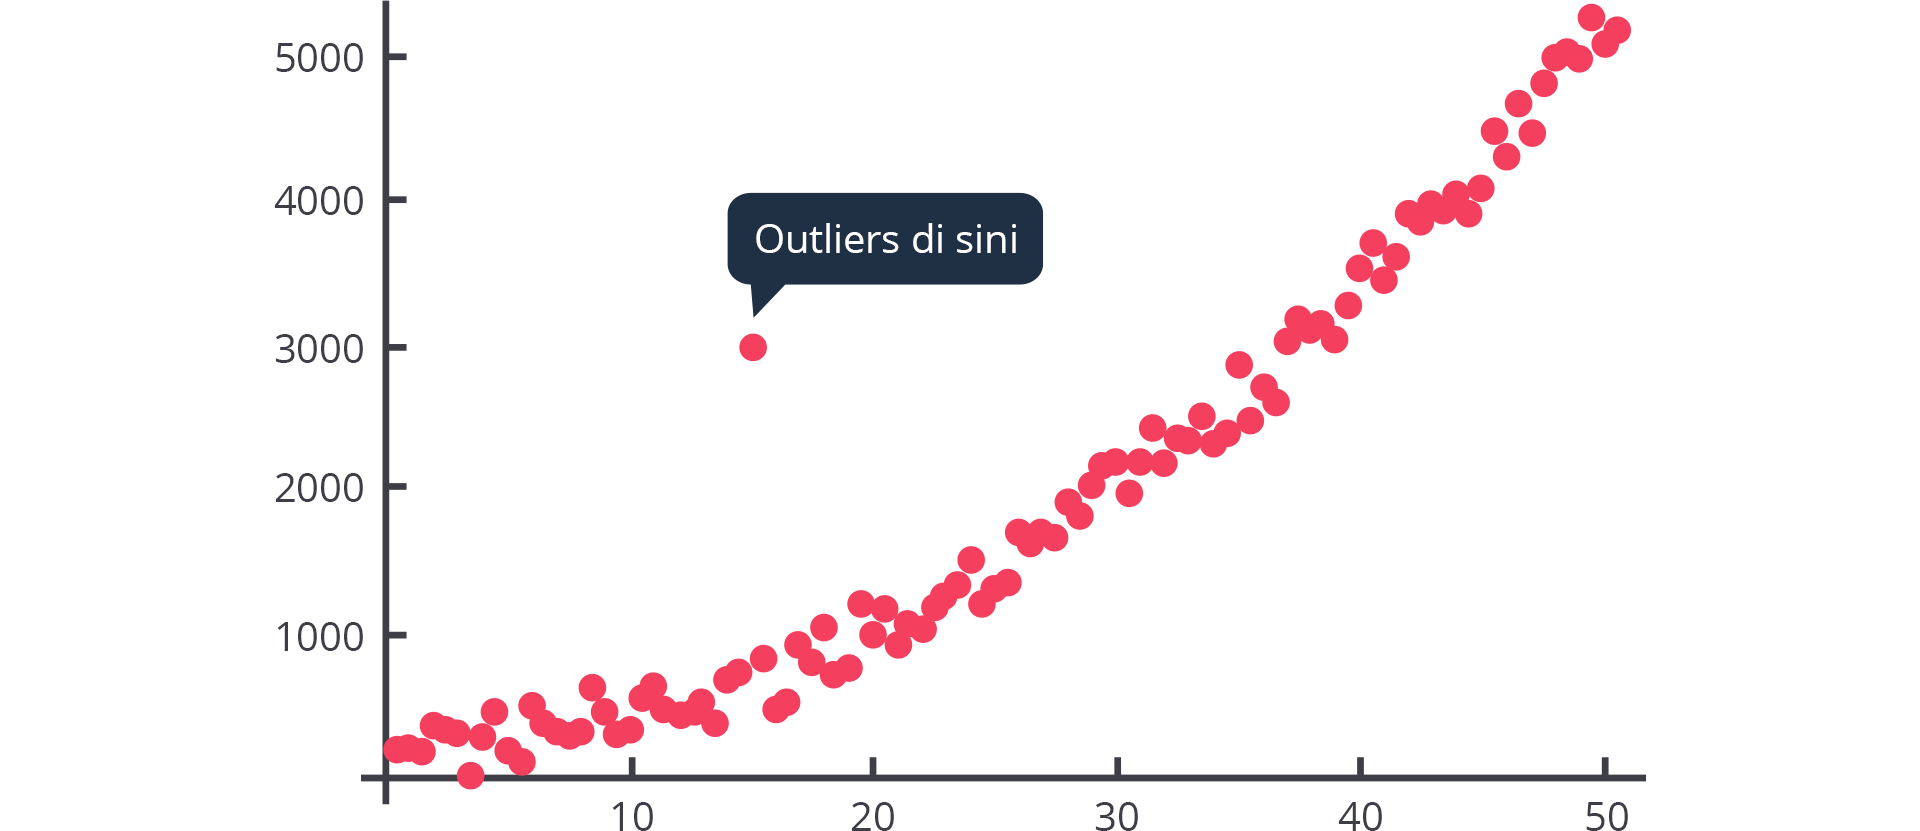

1. Carat

<Axes: xlabel='carat'>

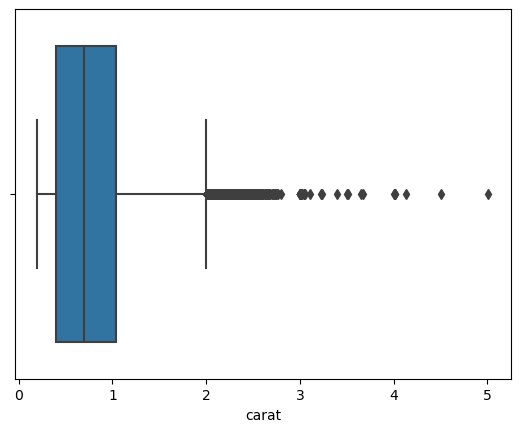

In [8]:
sns.boxplot(x=diamonds['carat'])

2. Fitur Table

<Axes: xlabel='table'>

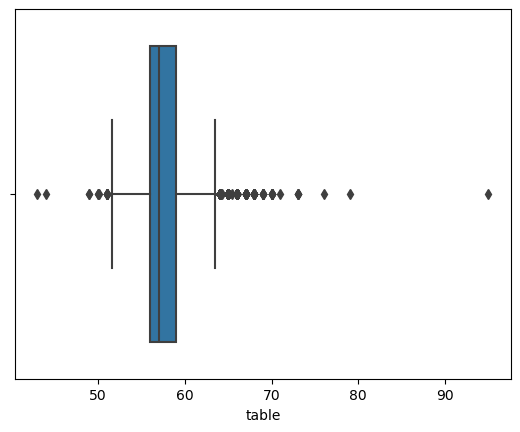

In [9]:
sns.boxplot(x=diamonds['table'])

3. Fitur x

<Axes: xlabel='x'>

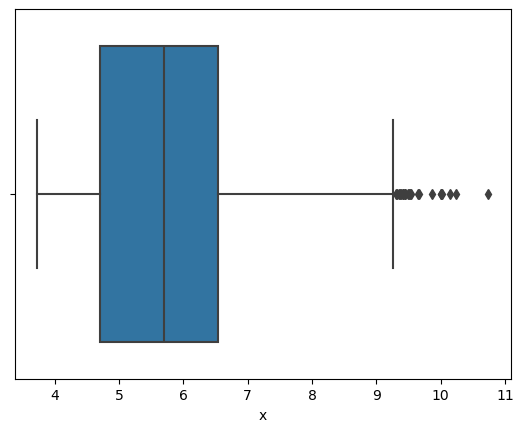

In [10]:
sns.boxplot(x=diamonds['x'])

Batas bawah = Q1 - 1.5 * IQR

Batas atas = Q3 + 1.5 * IQR

In [11]:
# Select only numeric columns
numeric_columns = diamonds.select_dtypes(include=[np.number])

# Calculate Q1, Q3, and IQR for numeric columns
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers from numeric columns
diamonds = diamonds[~((numeric_columns < (Q1-1.5*IQR)) | (numeric_columns > (Q3+1.5*IQR))).any(axis=1)]

# Check the shape of the dataframe after removing outliers
diamonds.shape

(47524, 10)

## Univariate Analysis

Bagi fitur menjadi dua bagian yaitu numerical features dan categorical features

In [12]:
numerical_features = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features =['cut', 'color', 'clarity']

Lakukan analisis terhadap fitur kategori terlebih dahulu

### Category Features

**Fitur Cut**

           jumlah sampel  persentase
cut                                 
Ideal              20340        42.8
Premium            12115        25.5
Very Good          10994        23.1
Good                3745         7.9
Fair                 330         0.7


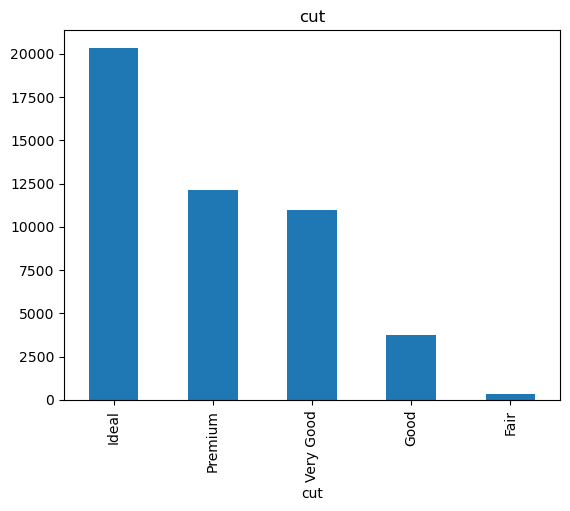

In [13]:
feature = categorical_features[0]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Terdapat 5 kategori pada fitur Cut:
- Ideal
- Premium
- Very Good
- Good
- Fair

Dari data persentase, kita dapat simpulkan bahwa lebih dari 660% sampel merupakan diamonds tipe grade tinggi, yaitu grade Ideal dan Premium

**Fitur Color**

       jumlah sampel  persentase
color                           
G              10081        21.2
E               8910        18.7
F               8466        17.8
H               7176        15.1
D               6195        13.0
I               4462         9.4
J               2234         4.7


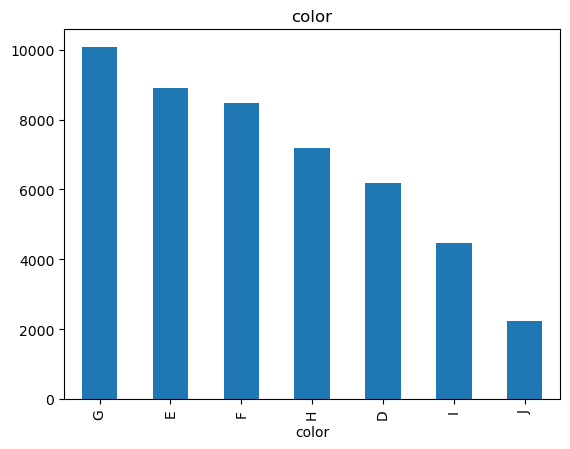

In [14]:
feature = categorical_features[1]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Berdasarkan grafik tersebut, dapat disimpulkan bahwa sebagian besar grade berada pada grade menengah,, yaitu G, F, H

**Fitur Clarity**

         jumlah sampel  persentase
clarity                           
SI1              11552        24.3
VS2              10928        23.0
SI2               7402        15.6
VS1               7373        15.5
VVS2              4683         9.9
VVS1              3463         7.3
IF                1650         3.5
I1                 473         1.0


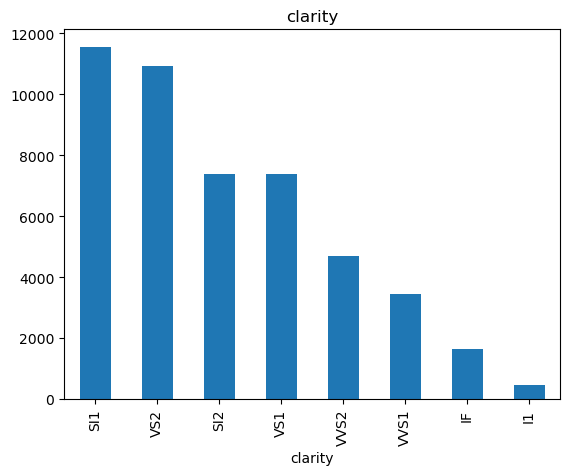

In [15]:
feature = categorical_features[2]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Berdasarkan grafik tersebut, dapat disimpulkan bahwa sebagian besar fitur merupakan grade rendah, yaitu SI1, SI2, dan VS2

### Numerical Features

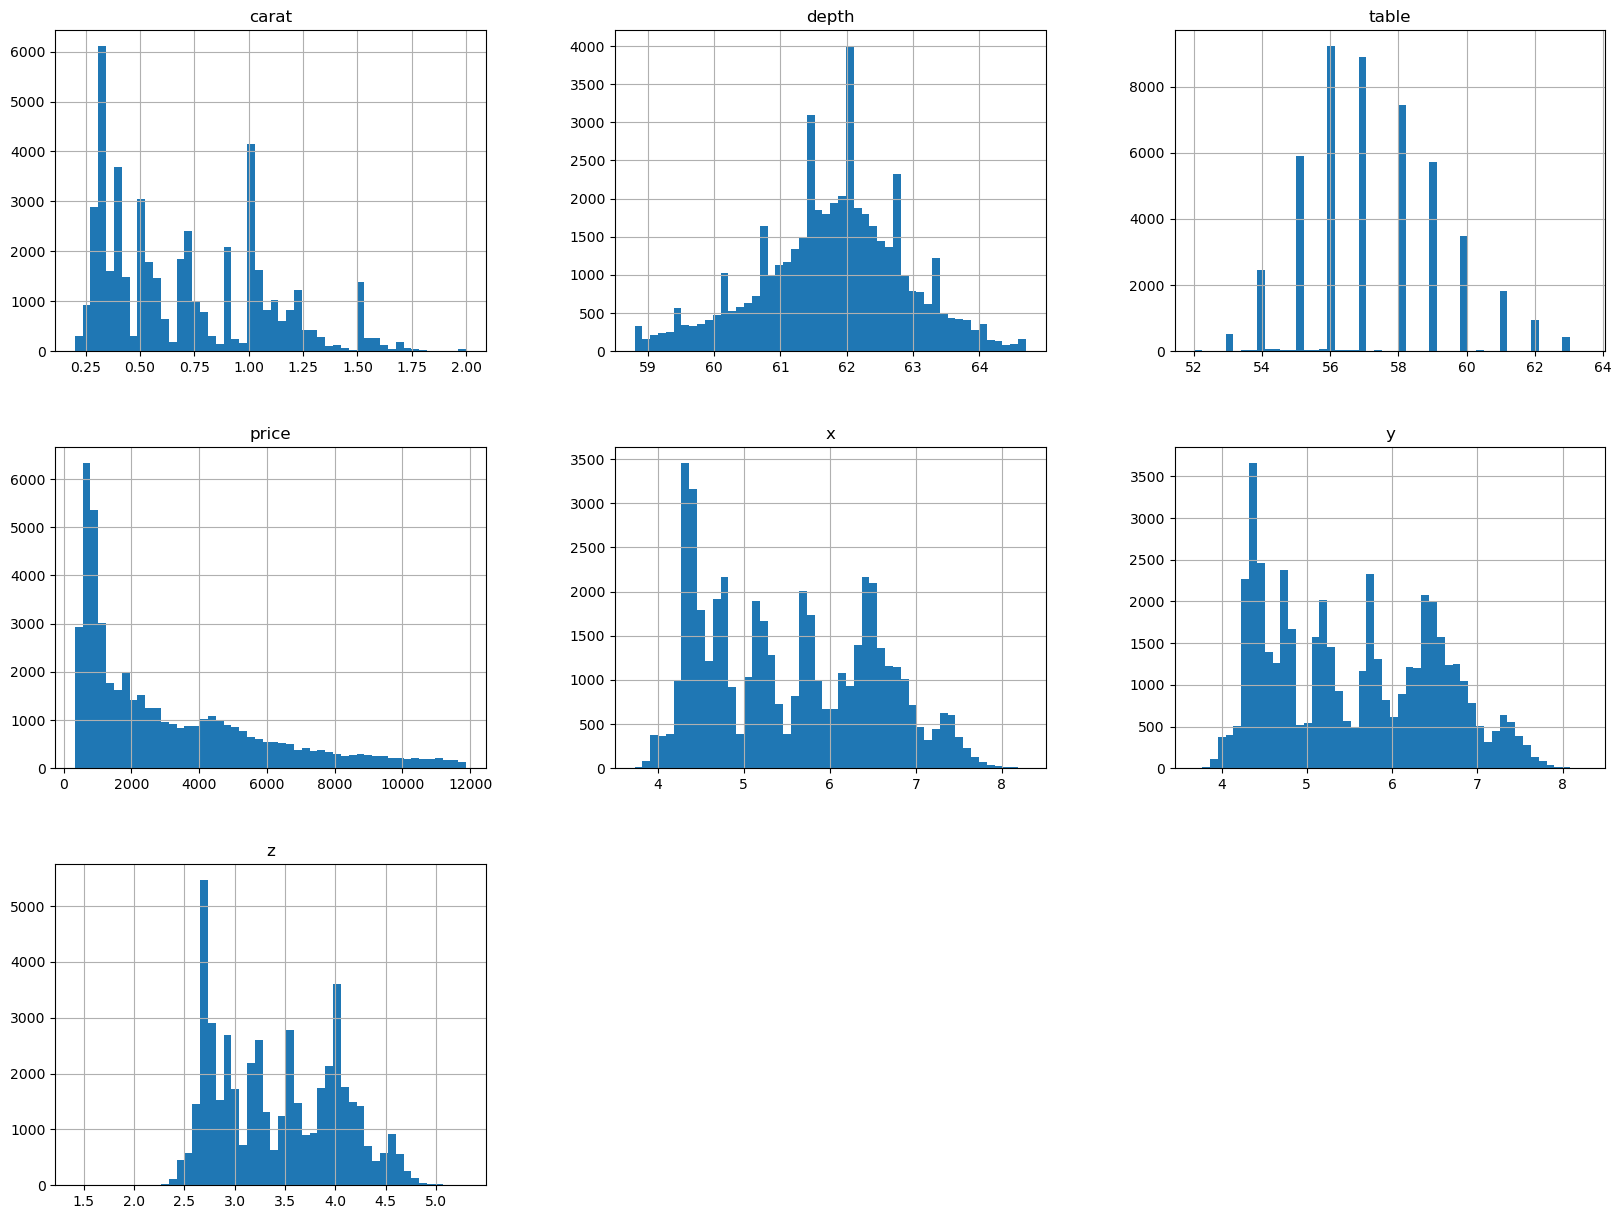

In [16]:
diamonds.hist(bins=50, figsize=(20,15))
plt.show()

## Multivariate Analysis

Multivariate EDA menunjukkan hubungan antara dua atau lebih variabel pada data. Multivariate EDA yang menunjukkan hubungan antara dua variabel biasa disebut sebagai bivariate EDA.

### Categorical Features

Mengecek rata rata harga terhadap masing masing fitur untuk mengetahui pengaruh fitur terhadap harga.

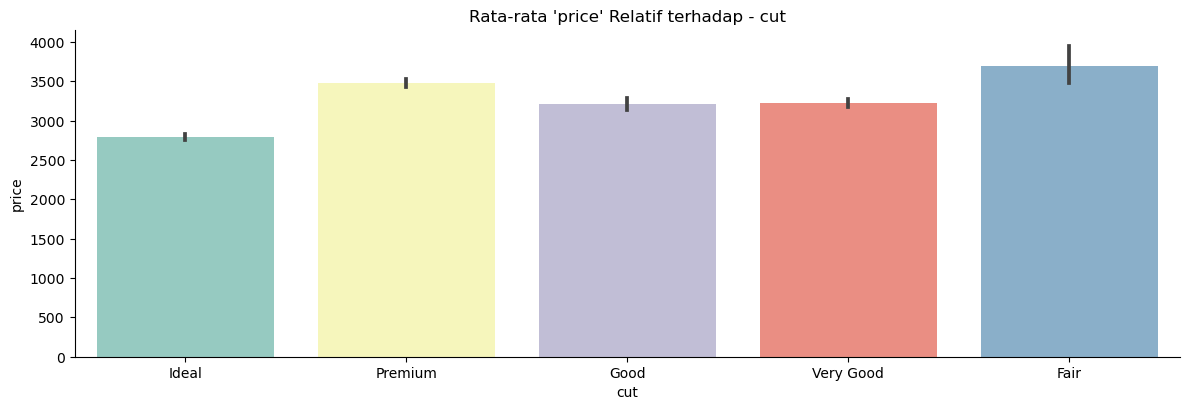

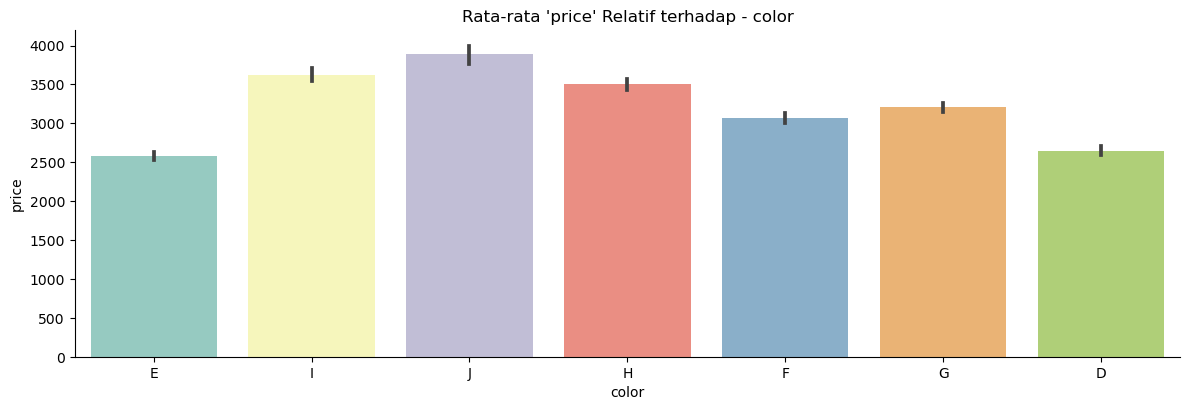

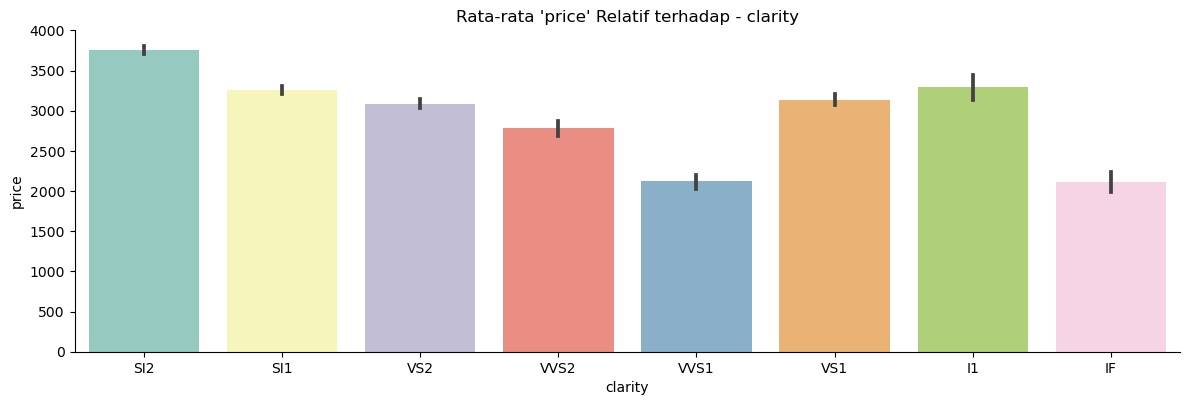

In [17]:
cat_features = diamonds.select_dtypes(include='object').columns.to_list()

for col in cat_features:
    sns.catplot(x=col, y='price', kind='bar', dodge=False, height=4, aspect=3, data=diamonds, palette='Set3')
    plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

1. Pada fitur 'cut', rentang harga cenderung mirip dari 3500 hingga 4500. Grade tertinggi (ideal) memiliki harga terendah diantara grade lainnya.
2. Fitur 'color' semakin rendah grade warna, harga diamonds justru semakin tinggi. Dapat disimpulkan bahwa warna memiliki pengaruh yang rendah terhadap harga.
3. Pada fitur 'clarity', secara umum diamond dengan grade yang lebih rendah memeiliki harga yang lebih tinggi. Hal ini berarti fitur 'clarity' memiliki pengaruh yang rendah terhadap harga.
4. Kesimpulan akhir, fitur kategori memiliki pengaruh yang rendah terhadap harga.

### Numerical Features

Untuk mengamati hubungan antara fitur numerik, kita akan menggunakan fungsi pairplot(). Kita juga akan mengobservasi korelasi antara fitur numerik dengan fitur target menggunakan fungsi corr()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

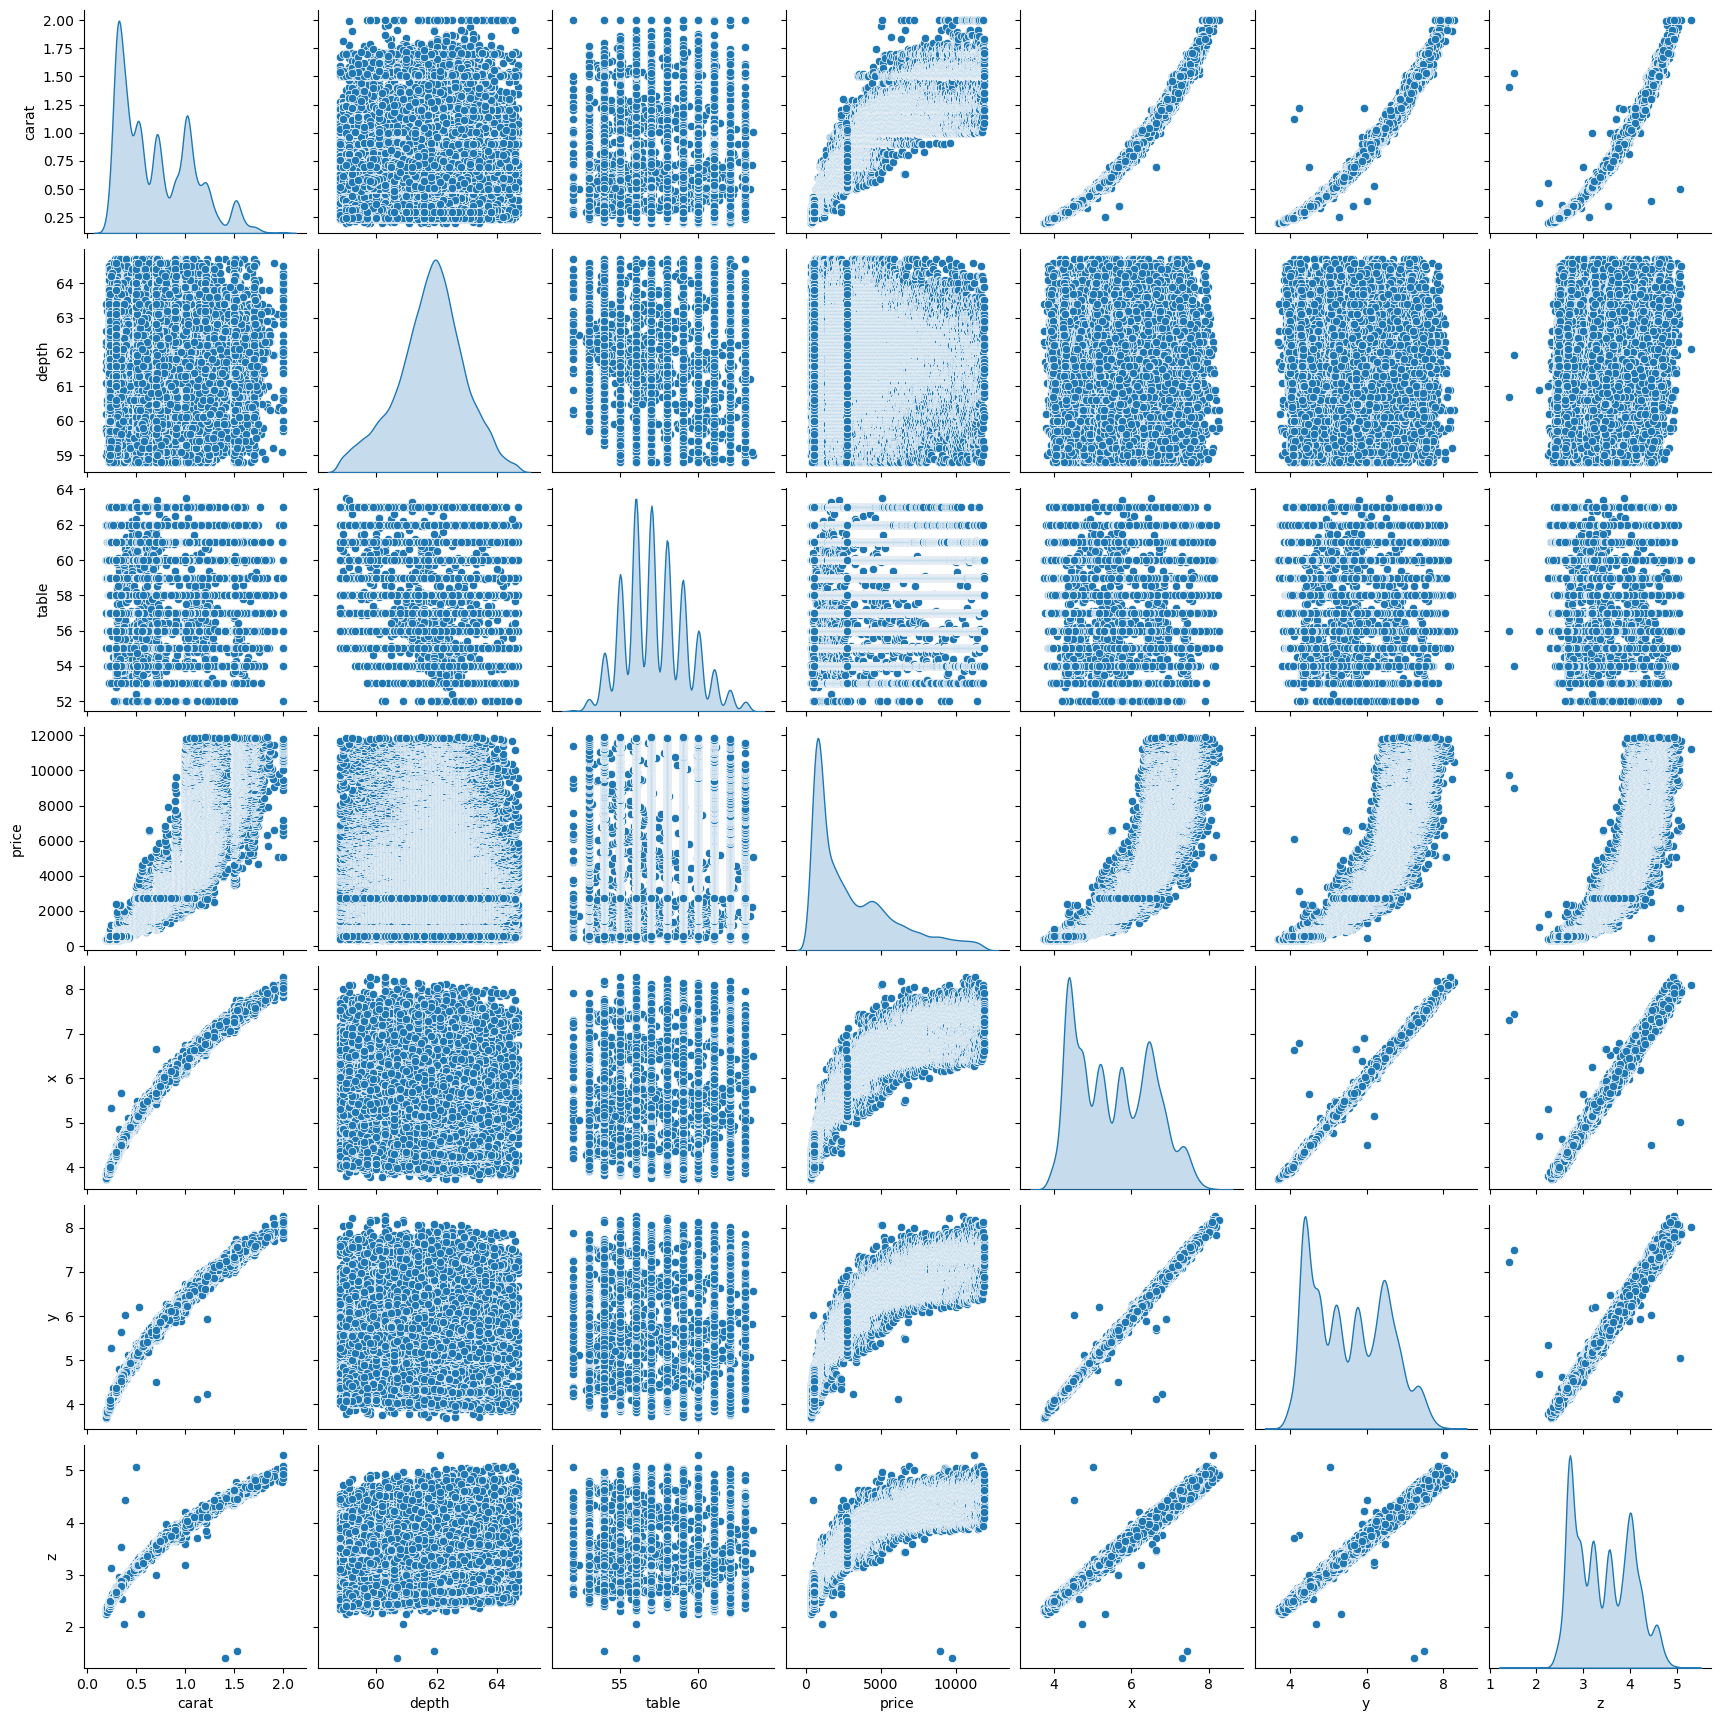

In [18]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(diamonds, diag_kind='kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

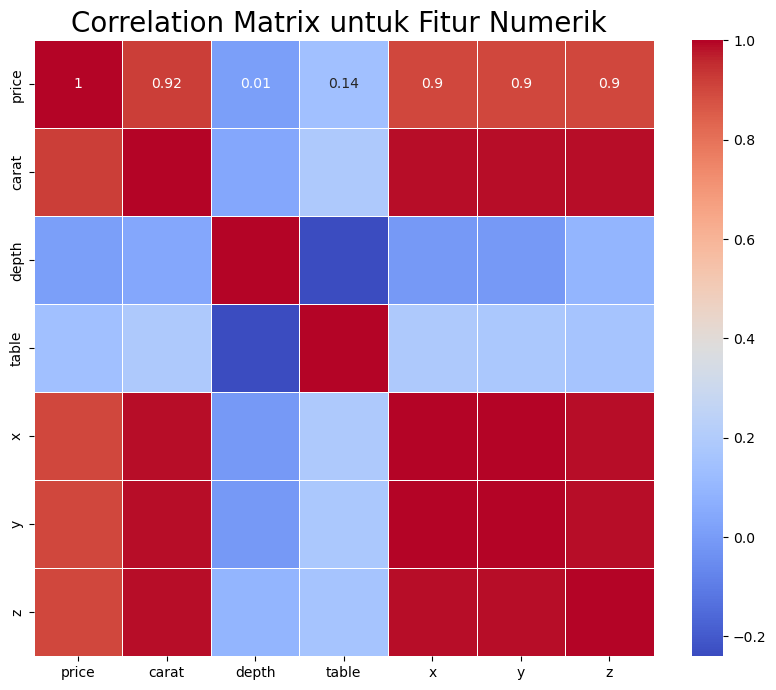

In [19]:
plt.figure(figsize=(10, 8))
correlation_matrix = diamonds[numerical_features].corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5 )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Fitur 'carat', 'x', 'y', 'z' memiliki skor korelasi yang besar (>0.9) dengan fitur target 'price'. Artinya,, fitur 'price' memiliki korelasi yang tinggi dengan keempat fitur tersebut. Sementara itu, fitur 'depth' memiliki korelasi yang sangat kecil (0.01) sehingga fitur tersebut dapat di-drop.

In [20]:
diamonds.drop(['depth'], inplace=True, axis=1)
diamonds.head()

,carat,cut,color,clarity,table,price,x,y,z
0,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,57.0,336,3.94,3.96,2.48


## Data Preparation

### Encoding Fitur Kategori

Menggunakan teknik one-hot-encoding

In [21]:
from sklearn.preprocessing import  OneHotEncoder

diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['cut'], prefix='cut')],axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['color'], prefix='color')],axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['clarity'], prefix='clarity')],axis=1)
diamonds.drop(['cut','color','clarity'], axis=1, inplace=True)
diamonds.head()

,carat,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,55.0,326,3.95,3.98,2.43,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,61.0,326,3.89,3.84,2.31,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
3,0.29,58.0,334,4.20,4.23,2.63,False,False,False,True,...,True,False,False,False,False,False,False,True,False,False
4,0.31,58.0,335,4.34,4.35,2.75,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False
5,0.24,57.0,336,3.94,3.96,2.48,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True


### Reduksi Dimensi dengan PCA

Teknik reduksi (pengurangan) dimensi adalah prosedur yang mengurangi jumlah fitur dengan tetap mempertahankan informasi pada data. Teknik pengurangna dimensi yang paling populer adapah Principal Component Analysis atau PCA. Ia adalah teknik untuk mereduksi dimensi, mengekstraksi fitur, dan mentransformasi data dari "n-dimensional space" ke dalam sistem berkoordinat baru dengan dimensi m, dimana m lebih kecil dari n.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


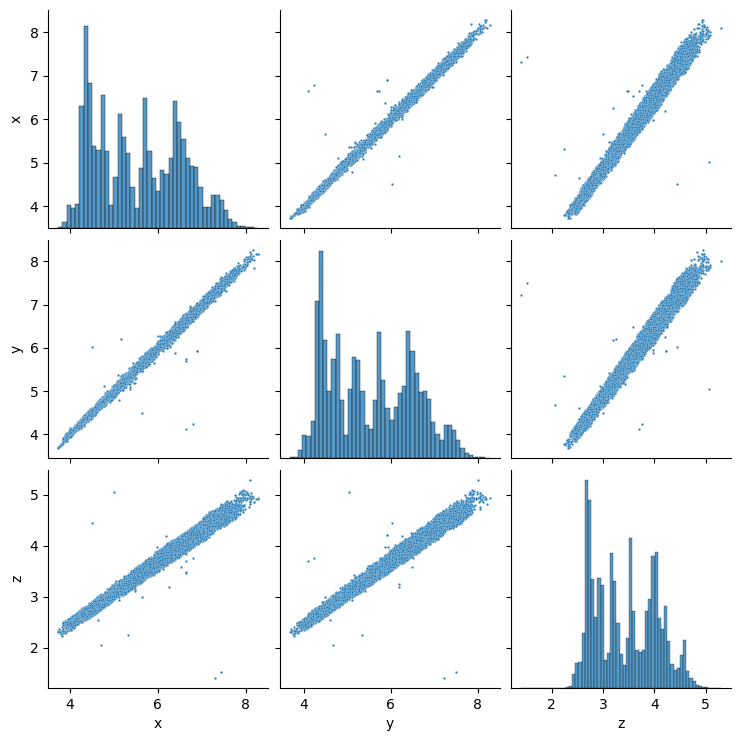

In [22]:
sns.pairplot(diamonds[['x', 'y', 'z']], plot_kws={"s": 3})

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=123)
pca.fit(diamonds[['x', 'y', 'z']])
princ_comp = pca.transform(diamonds[['x', 'y', 'z']])

In [26]:
pca.explained_variance_ratio_.round(3)

array([0.998])

99.8% informasi pada ketiga fitur x, y, z terdapat pada PC pertama, sisanya 0.2% dan 0.1%.

Kita akan mereduksi fitur (dimensi) dan hanya mempertahankan PC (komponen) pertama saja.

- Gunakan n_component = 1, karena kali ini, jumlah komponen kita hanya satu.
- Fit model dengan data masukan.
- Tambahkan fitur baru ke dataset dengan nama 'dimension' dan lakukan proses transformasi.
- Drop kolom ‘x’, ‘y’, dan ‘z’.

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
pca.fit(diamonds[['x','y','z']])
diamonds['dimension'] = pca.transform(diamonds.loc[:, ('x','y','z')]).flatten()
diamonds.drop(['x','y','z'], axis=1, inplace=True)

### Train-Test-Split

In [28]:
from sklearn.model_selection import train_test_split

X = diamonds.drop(["price"], axis=1)
y = diamonds["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=123)

In [29]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 47524
Total # of sample in train dataset: 42771
Total # of sample in test dataset: 4753


### Standarisasi

In [30]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['carat', 'table', 'dimension']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,carat,table,dimension
536,-0.026226,0.864091,0.143464
21293,1.348407,1.359644,1.353588
45577,-0.511390,-0.622566,-0.372761
37379,-0.834833,-0.622566,-0.905790
38240,-0.861787,-0.622566,-0.813165


In [31]:
X_train[numerical_features].describe().round(4)

,carat,table,dimension
count,42771.0000,42771.0000,42771.0000
mean,0.0000,-0.0000,-0.0000
std,1.0000,1.0000,1.0000
min,-1.3739,-2.6048,-1.8867
25%,-0.8887,-0.6226,-0.9283
50%,-0.2688,-0.1270,-0.1063
75%,0.8093,0.8641,0.8847
max,3.4777,3.0941,2.6998


## Model Development

Pengembangan model dengan tiga algoritma. Kemudian akan mengevaluasi performa masing amsing algoritma dan mennetukan algoritma mana yang memberikan hasil prediksi terbaik.
1. K-Nearest Neighbor
2. Random Forest
3. Boosting Algorithm

### K-Nearest Neighbor

KNN menggunakan 'kesamaan fitur' untuk memprediksi nilai dari setiap data yang baru. Setiap data baru diberi nilai berdasarkan seberapa mirip titik tersebut dalam set pelatihan.

KNN bekerja dengan membandingkan jarak satu sampel ke sampel pelatihan lain dengan memilih sejumlah k tetangga terdekat (dengan k adalah sebuah angka positif).

In [32]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [33]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse', 'knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

### Random Forest

Random Forest adalah salah satu algoritma supervised learning. Digunakan untuk menyelesaikan masalah klasifikasi dan regresi. 

In [36]:
from sklearn.ensemble import RandomForestRegressor

# Buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse', 'RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

### Boosting Algorithm

Boosting adalah teknik yang menggunakan model yang lebih kecil (kecil seperti decision tree) sebagai base learner. Mereka dibandingkan dan diberi nilai berdasarkan hasil prediksi model tersebut.

Algoritma yang menggunakan teknik boosting bekerja dengan membangun model dari data latih. Kemudian ia membuat model kedua yang bertugas memperbaiki kesalahan dari model pertama. Model ditambahkan sampai data latih terprediksi dengan baik atau telah mencapai jumlah maksimum model untuk ditambahkan. 

In [37]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse', 'Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

## Evaluasi Model

Metrik yang akan kita gunakan pada prediksi ini adalah MSE atau Mean Squared Error yang menghitung jumlah selisih kuadrat rata-rata nilai sebenarnya dengan nilai prediksi.

**Scaling Fitur Numerik**

In [38]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

**Evaluasi Ketiga Model**

In [39]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN', 'RF', 'Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
    
# Panggil mse
mse

,train,test
KNN,203.764218,239.534955
RF,52.287366,130.788418
Boosting,904.838013,846.212966


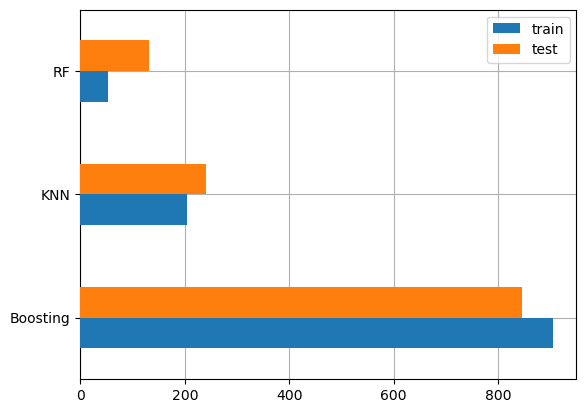

In [40]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Terlihat bahwa model Random Forest (RF) memberikan nilai eror yang paling kecil. Sehingga model RF yang akan dipilih sebagai model terbaik untuk melakukan prediksi harga diamonds.

Untuk mengujinya, buat prediksi menggunakan beberapa harga dari data test.

In [41]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true': y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
    
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
35096,886,923.2,884.2,788.1


Terlihat bahwa prediksi dengan Random Forest (RF) memberikan hasil yang paling mendekati.